### 히스토그램을 활용한 이미지 유사도 검출

* cv2.HISTCMP_CORREL: 상관관계 (1: 완전 일치, -1: 완전 불일치, 0: 무관계)
* cv2.HISTCMP_CHISQR: 카이제곱 (0: 완전 일치, 무한대: 완전 불일치)
* cv2.HISTCMP_INTERSECT: 교차 (1: 완전 일치, 0: 완전 불일치 - 1로 정규화한 경우)

CORREL    	img1:   1.00	img2:   0.75	img3:   0.09	img4:   0.05	
CHISQR    	img1:   0.00	img2: 138.73	img3:1355.65	img4:98757.78	
INTERSECT 	img1:   1.00	img2:   0.75	img3:   0.17	img4:   0.31	


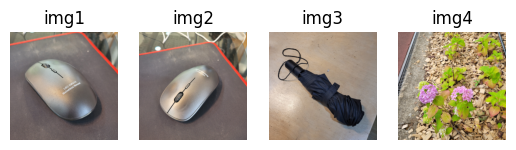

In [19]:
import cv2, numpy as np
import matplotlib.pylab as plt

img1 = cv2.imread('c:/data/temp/mouse1.jpg')
img2 = cv2.imread('c:/data/temp/mouse2.jpg')
img3 = cv2.imread('c:/data/temp/umb1.jpg')
img4 = cv2.imread('c:/data/temp/flower1.jpg')

imgs = [img1, img2, img3, img4]
hists = []
for i, img in enumerate(imgs) :
    # plt 위한 RGB 변환 후 출력 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off') 
    plt.imshow(img)
    
    #HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    #---② H,S 색상, 채도 채널에 히스토그램 계산
    hist = cv2.calcHist([hsv], [0,1], None, [128, 128], [0,256,0,256])
    
    #---③ 0~1로 정규화후 hists에 저장
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)


query = hists[0]
methods = {'CORREL' :cv2.HISTCMP_CORREL, 'CHISQR':cv2.HISTCMP_CHISQR, 
           'INTERSECT':cv2.HISTCMP_INTERSECT}

for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우 
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()
plt.show()